## **1 Iris Flower Classification**

This project demonstrates classification of the Iris species using various features such as **SepalLengthCm,SepalWidthCm, PetalLengthCm, PetalWidthCm,Species**.
We will go through data preprocessing,exploratory data analysis(EDA),model building and evaluation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


### **1.1 Dataset Overview**

Let's load the dataset and check its basic structure

In [316]:
#loading the data and storing in a variable
iris_data=pd.read_csv("../data/Iris.csv")
iris_data=iris_data.set_index('Id')


In [317]:
#getting the first 5 rows of the datset
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [318]:
# Quick summary of columns, data types, non-null counts, and memory usage
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [319]:
#shape(rows and columns) of the dataset
iris_data.shape

(150, 5)

In [320]:
# Shows summary statistics (count, mean, std, min, quartiles, max) for numeric columns
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [321]:
# Returns the unique values in the column
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [322]:
#returns the columns in the datset
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### **1.2 Data Cleaning**
• Check for duplicates

• Check for missing values

• Ensure proper datatypes 

In [323]:
#prints the duplicates in the dataset
print(iris_data[iris_data.duplicated()])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
35             4.9           3.1            1.5           0.1     Iris-setosa
38             4.9           3.1            1.5           0.1     Iris-setosa
143            5.8           2.7            5.1           1.9  Iris-virginica


In [324]:
#dropping duplicates
iris_data=iris_data.drop_duplicates()

In [325]:
#checking for dupliactes after dropping them
iris_data.duplicated().sum()

np.int64(0)

In [326]:
#checking for sum of missing values in each column
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **1.3 Exploratory Data Analysis(EDA)**

Let's explore the datset with some visualizations

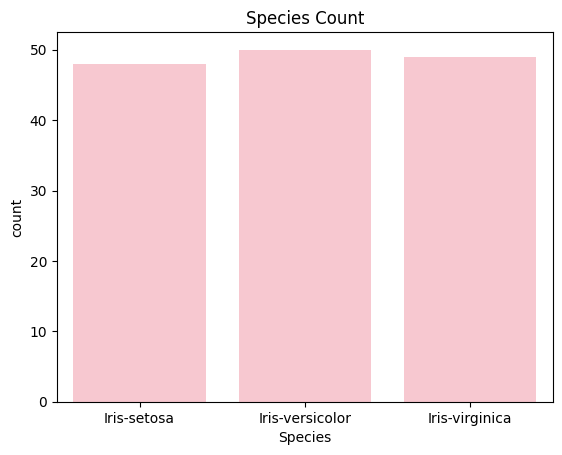

<Figure size 1200x800 with 0 Axes>

In [327]:
# Visualizes the count of each category
sns.countplot(x='Species',data=iris_data,color='pink')
plt.title('Species Count')
plt.figure(figsize=(12,8))
plt.show()

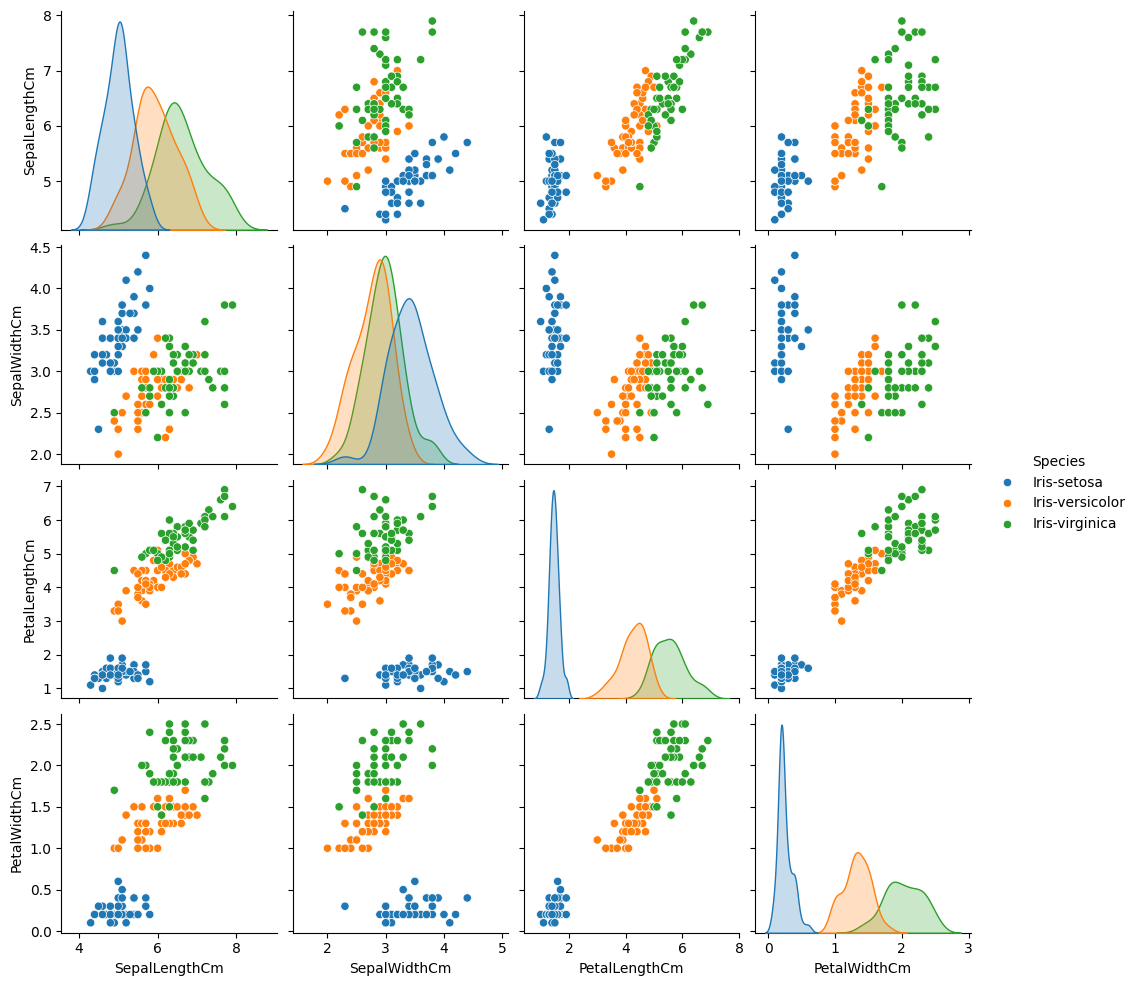

In [328]:
# Shows pairwise relationships between features with distributions
sns.pairplot(iris_data,hue='Species')
plt.show()

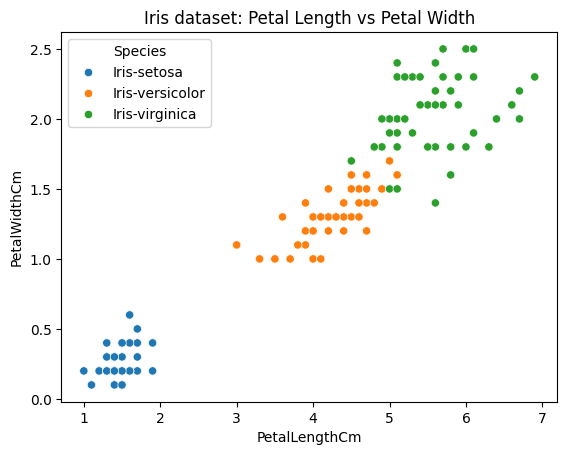

In [329]:
# Displays the relationship between two variables
sns.scatterplot(
    data=iris_data, 
    x='PetalLengthCm', 
    y='PetalWidthCm', 
    hue='Species'
)
plt.title("Iris dataset: Petal Length vs Petal Width")
plt.show()


### **1.4 Feature Engineering**

Convert categorical columns into numerical representations for modeling

In [330]:
# Converts categorical labels into numeric codes
le=LabelEncoder()
iris_data['Species_encoded']=le.fit_transform(iris_data['Species'])

In [331]:
#checking the first 5 rows after appling Label Encoder
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


### **1.5 Train-Test Split**

Divide the data into training and testing sets

In [332]:
#splitting the features and target
X=iris_data.drop(columns=['Species','Species_encoded'],axis=1)
y=iris_data['Species_encoded']

In [333]:
#splitting the datset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **1.6 Model Training**

We will train both Decision Tree and KNN and compare the performance

In [334]:
# Train a Decision Tree on the training set and predict on the test set

model=DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [335]:
# Train a KNN on the training set and predict on the test set
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


### **1.7 Model Evaluation**

In [336]:
# Evaluate model performance of Decision Tree using accuracy, confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9333333333333333
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [337]:
# Evaluate model performance of KNN using accuracy, confusion matrix
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.9333333333333333
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [338]:
# Compare the accuracy of different models in a DataFrame
models = ["Decision Tree", "KNN"]
accuracies = [
    accuracy_score(y_test, y_pred),         
    accuracy_score(y_test, y_pred_knn),     
    
]
results = pd.DataFrame({"Model": models, "Accuracy": accuracies})
print(results)

           Model  Accuracy
0  Decision Tree  0.933333
1            KNN  0.933333


In [339]:
# Save model comparison results to a CSV file
results.to_csv("../scripts/predictions.csv")

### **1.8 Conclusion**
• We compared multiple learning models for predicting Species

• The model achieved 93 accuracy on the test set. This is common with the Iris dataset, because Setosa is linearly separable, and Versicolor and Virginica are only partially overlapping. In some splits, small misclassifications occur only between Versicolor and Virginica
